In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import pickle

In [2]:
import matplotlib
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

In [3]:
# train_output_folder = './train_output_full0/'
train_output_folder = './experiments/full_slow_sort_2x125x2/full_input73/20160_only/train_output_full0/'

In [7]:
from _sonic_inverse_tools import plot_results
from _sonic_inverse_tools import create_Y_data, calc_cij

In [8]:
with open(train_output_folder + 'predictions_train.pkl', 'rb') as fp:
    predictions_train = pickle.load(fp)
with open(train_output_folder + 'y_train.pkl', 'rb') as fp:
    y_train = pickle.load(fp)
with open(train_output_folder + 'predictions_valid.pkl', 'rb') as fp:
    predictions_valid = pickle.load(fp)
with open(train_output_folder + 'y_val.pkl', 'rb') as fp:
    y_val = pickle.load(fp)
# with open(train_output_folder + 'predictions_noise2.pkl', 'rb') as fp:
#     predictions_noise2 = pickle.load(fp)

In [9]:
tag = ['r', 'c11', 'c13', 'c33', 'c44', 'c66']

In [11]:
data_Y, data_Y_idx, max_dict, mean_dict = create_Y_data('./dataset/20160/ds_logfile_20160.txt', 20148, tag)
# convert to cij
for i in range(data_Y.shape[0]):
    data_Y[i,:] = calc_cij(data_Y[i,0], data_Y[i,1], data_Y[i,2], data_Y[i,3], data_Y[i,4], data_Y[i,5])
true_noise2 = data_Y
del data_Y

data_Y_norm mean: 1.1755389050362321e-18
data_Y_norm min: -0.5101033416925604
data_Y_norm max: 0.8452307545103778


/home/mbazulin/from_dgx/sonic_ml/_sonic_inverse_tools.py:45: RuntimeWarning: invalid value encountered in sqrt
  c13 = np.sqrt(delta*c33*c33+(c33-c44)*(c33*(1+eps)-c44))-c44


In [ ]:
# find idx of y_val for the full dataset
idx = np.zeros(len(y_val))
for i, item in enumerate(y_val[:,1]):
    idx[i] = np.where(item == y_val[:, 1])[0]

In [54]:
np.where(np.round(item, 2) == np.round(y_val[:, 1],2))[0]

array([   5, 1861])

In [36]:
np.where(np.round(item, 5) == np.round(y_val[:, 1],5))[0]

array([], dtype=int64)

In [30]:
np.where(true_noise2[1,1] == )

(array([936]),)

convert thomseon to Cij

In [7]:
# def calc_cij(rho, vp, vs, eps, gamma, delta):
#     c33 = vp*vp*rho
#     c44 = vs*vs*rho
#     c11 = c33*(2*eps + 1)
#     c66 = 2*c44*(gamma + 0.5)
#     c13 = np.sqrt(delta*c33*c33+(c33-c44)*(c33*(1+eps)-c44))-c44
#     coef = 1e9
#     return np.array([rho, c11/coef, c13/coef, c33/coef, c44/coef, c66/coef])

In [8]:
# predictions_valid_cij = np.zeros(predictions_valid.shape)
# y_val_cij = np.zeros(y_val.shape)

In [9]:
# # convert to thomsen
# for i in range(y_val.shape[0]):
#     predictions_valid_cij[i,:] = calc_cij(predictions_valid[i,0], predictions_valid[i,1], predictions_valid[i,2], predictions_valid[i,3], predictions_valid[i,4], predictions_valid[i,5])
#     y_val_cij[i,:] = calc_cij(y_val[i,0], y_val[i,1], y_val[i,2], y_val[i,3], y_val[i,4], y_val[i,5])

In [10]:
# for i in range(y_val.shape[0]):
#     if np.any(np.isnan(predictions_valid_cij[i,:])):
#         predictions_valid_cij[i,:] =y_val_cij[i,:]

plot results

In [ ]:
true_arr[:,i], pred_arr[:,i]

In [34]:
def plot_results(true_arr, pred_arr, true_arr_noise, pred_arr_noise, tag):
    true_arr = np.copy(true_arr)
    pred_arr = np.copy(pred_arr)
    fig_res, ax_res = plt.subplots(len(tag),1)
    fig_res.set_size_inches(10, 55)
    for i in range(len(tag)):
        if tag[i] == 'c13':
            idx = np.where(abs(true_arr[:,i] - pred_arr[:,i]) > 1)
            print(idx)
            ax_res[i].scatter(true_arr[idx,i], pred_arr[idx,i], 'rx')
#             true_arr[idx, i] = 0
#             pred_arr[idx, i] = 0
        # --- #
#         ax_res[i].scatter(true_arr_noise[:,i], pred_arr_noise[:,i], facecolor='tab:red', edgecolor='k', marker='.')
        # --- #
        # --- #
        ax_res[i].plot(true_arr[:,i], true_arr[:,i], 'r', linewidth=1)
        ax_res[i].scatter(true_arr[:,i], pred_arr[:,i], facecolor='tab:blue', edgecolor='k',)
        # --- #
        ax_res[i].set(xlabel='true', ylabel= 'predicted', title=tag[i])
    return fig_res

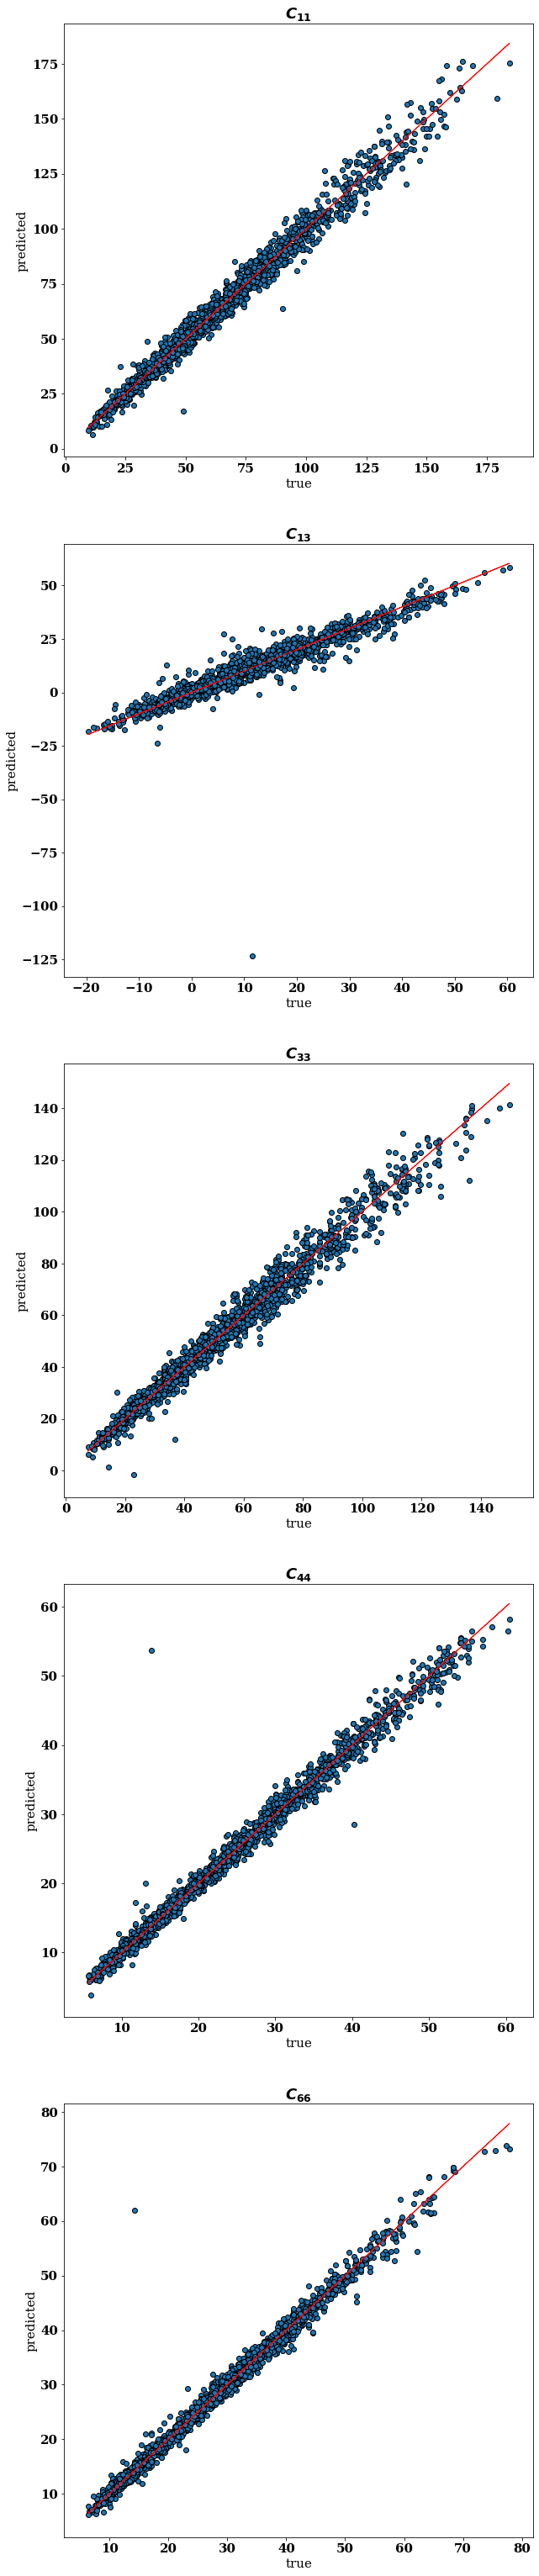

In [35]:
# tag = ['r', 'c11', 'c13', 'c33', 'c44', 'c66']
tag = [r'$C_{11}$', r'$C_{13}$', r'$C_{33}$', r'$C_{44}$', r'$C_{66}$']
fig = plot_results(y_val[:,1:], predictions_valid[:,1:], y_train[:,1:], predictions_train[:,1:], tag)
# fig.savefig('results.png', dpi=300)

In [13]:
# y_val = np.copy(y_val_cij)
# predictions_valid = np.copy(predictions_valid_cij)
# del y_val_cij, predictions_valid_cij

In [14]:
# # calculate different metrics
# def calc_metrics(arr_true, arr_pred):
#     MSE = np.sum((arr_true - arr_pred)**2)/len(arr_true)
#     # absolute
#     std_dev_abs = MSE**0.5
#     mean_diff_abs = np.mean(abs(arr_true - arr_pred))
#     max_diff_abs = np.max(abs(arr_true - arr_pred))
#     # realtive
#     norm_coef = abs(np.max(arr_true)-np.min(arr_true))
#     std_dev_rel = std_dev_abs/norm_coef*100
#     mean_diff_rel = mean_diff_abs/norm_coef*100
#     max_diff_rel = max_diff_abs/norm_coef*100
#     # R2
#     ss_tot = np.sum((arr_true-np.mean(arr_true))**2)
#     ss_res = np.sum((arr_true-arr_pred)**2)
#     r2 = 1 - ss_res/ss_tot
#     return std_dev_rel, mean_diff_rel, max_diff_rel, r2

In [15]:
# calculate different metrics
def calc_metrics(arr_true, arr_pred):
    diff = arr_true - arr_pred
    my_range = np.max(diff) - np.min(diff)
    print('range:', my_range)
    mean = abs(np.mean(diff))
    std = np.std(diff)
    return std, mean, 3*std

In [22]:
metrics_dict={
#     'r' : calc_metrics(y_val[:,0], predictions_valid[:,0]),
    'c11' : calc_metrics(y_val[:,1], predictions_valid[:,1]),
    'c13' : calc_metrics(y_val[:,2], predictions_valid[:,2]),
    'c33' : calc_metrics(y_val[:,3], predictions_valid[:,3]),
    'c44' : calc_metrics(y_val[:,4], predictions_valid[:,4]),
    'c66' : calc_metrics(y_val[:,5], predictions_valid[:,5])
}

range: 41.10410952648084
range: 74.78886080201092
range: 38.21855947069923
range: 24.341087934765632
range: 11.65780992241805


In [20]:
metrics_dict={
#     'r' : calc_metrics(true_noise2[:,0], predictions_noise2[:,0]),
    'c11' : calc_metrics(true_noise2[:,1], predictions_noise2[:,1]),
    'c13' : calc_metrics(true_noise2[:,2], predictions_noise2[:,2]),
    'c33' : calc_metrics(true_noise2[:,3], predictions_noise2[:,3]),
    'c44' : calc_metrics(true_noise2[:,4], predictions_noise2[:,4]),
    'c66' : calc_metrics(true_noise2[:,5], predictions_noise2[:,5])
}

range: 174.55136169655188
range: 330.26302602092437
range: 152.03623324887306
range: 77.86788125410254
range: 56.1023072996548


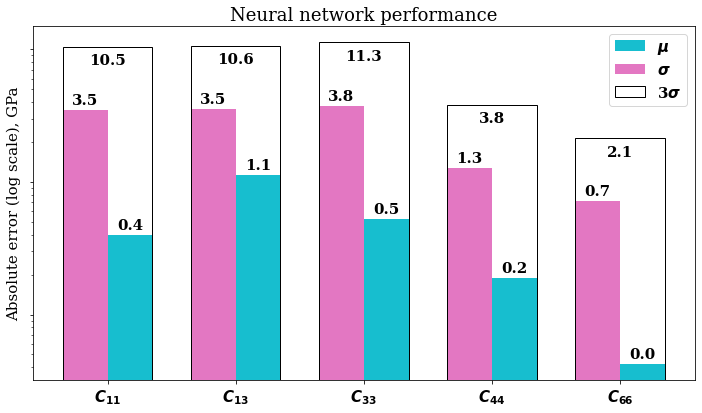

In [23]:
# labels = [r'$\rho$', r'$C_{11}$', r'$C_{13}$', r'$C_{33}$', r'$C_{44}$', r'$C_{66}$']
labels = [r'$C_{11}$', r'$C_{13}$', r'$C_{33}$', r'$C_{44}$', r'$C_{66}$']
# std_dev = [0.7101586, 0.4712332, 0.5222675, 1.3416208, 0.7685968, 0.7802289]
# mean_err = [0.5054383, 0.3598838, 0.4053533, 0.7889403, 0.4631307, 0.4683593]
# max_err = [6.1819576, 3.2700878, 2.4661135, 13.5942921, 9.8679855, 9.2020445]

# std_dev = [metrics_dict['r'][0], metrics_dict['c11'][0], metrics_dict['c13'][0], metrics_dict['c33'][0], metrics_dict['c44'][0], metrics_dict['c66'][0]]
# mean_err = [metrics_dict['r'][1], metrics_dict['c11'][1], metrics_dict['c13'][1], metrics_dict['c33'][1], metrics_dict['c44'][1], metrics_dict['c66'][1]]
# max_err = [metrics_dict['r'][2], metrics_dict['c11'][2], metrics_dict['c13'][2], metrics_dict['c33'][2], metrics_dict['c44'][2], metrics_dict['c66'][2]]
std_dev = [metrics_dict['c11'][0], metrics_dict['c13'][0], metrics_dict['c33'][0], metrics_dict['c44'][0], metrics_dict['c66'][0]]
mean_err = [metrics_dict['c11'][1], metrics_dict['c13'][1], metrics_dict['c33'][1], metrics_dict['c44'][1], metrics_dict['c66'][1]]
max_err = [metrics_dict['c11'][2], metrics_dict['c13'][2], metrics_dict['c33'][2], metrics_dict['c44'][2], metrics_dict['c66'][2]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x + width/2, mean_err, width, label=r'$\mu$', facecolor='tab:cyan')
rects1 = ax.bar(x - width/2, std_dev, width, label=r'$\sigma$', facecolor='tab:pink')
rects3 = ax.bar(x, max_err, width*2, label=r'3$\sigma$', facecolor='None', edgecolor='k')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Absolute error (log scale), GPa')
ax.set_yscale('log')
# ax.set_ylim([0, 10**2])
ax.set_title('Neural network performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticklabels('')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, 0.7*height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel1(rects3)
fig.set_size_inches(10,6)
fig.tight_layout()
fig.savefig('res_stats.png', dpi=300)
# plt.show()

In [19]:
# labels = [r'$0\%$', r'$10\%$', r'$25\%$', r'$50\%$']
# # r2_noise0 = [0.9990533, 0.9995185, 0.9996709, 0.9962657, 0.9983733, 0.9990207]
# # r2_noise5 = [0.9990243, 0.9995112, 0.9996704, 0.9961435, 0.9983137, 0.9989845]
# # r2_noise10 = [0.9989554, 0.9994975, 0.9996618, 0.9958097, 0.9982241, 0.9989188]
# # r2_noise25 = [0.9984444, 0.9993998, 0.9996161, 0.9930098, 0.9970992, 0.9983492]
# # r2_noise50 = [0.9965671, 0.9990340, 0.9994873, 0.9833623, 0.9928915, 0.9963520]
# # r2_noise100 = [0.9890388, 0.9970664, 0.9988554, 0.9389374, 0.9721096, 0.9866358]

# #r2
# # r2_rho = [0.9990533, 0.9990243, 0.9989554, 0.9984444, 0.9965671]
# # r2_vp = [0.9995185, 0.9995112, 0.9994975, 0.9993998, 0.9990340]
# # r2_vs = [0.9996709, 0.9996704, 0.9996618, 0.9996161, 0.9994873]
# # r2_eps = [0.9962657, 0.9961435, 0.9958097, 0.9930098, 0.9833623]
# # r2_gamma = [0.9983733, 0.9983137, 0.9982241, 0.9970992, 0.9928915]
# # r2_delta = [0.9990207, 0.9989845, 0.9989188, 0.9983492, 0.9963520]

# #1-r2
# r2_rho = [1-metrics_dict['r'][3], 1-0.9989554, 1-0.9984444, 1-0.9965671]
# r2_vp = [1-metrics_dict['p'][3], 1-0.9994975, 1-0.9993998, 1-0.9990340]
# r2_vs = [1-metrics_dict['s'][3], 1-0.9996618, 1-0.9996161, 1-0.9994873]
# r2_eps = [1-metrics_dict['e'][3], 1-0.9958097, 1-0.9930098, 1-0.9833623]
# r2_gamma = [1-metrics_dict['g'][3], 1-0.9982241, 1-0.9970992, 1-0.9928915]
# r2_delta = [1-metrics_dict['d'][3], 1-0.9989188, 1-0.9983492, 1-0.9963520]

# x = np.arange(len(labels))  # the label locations
# width = 0.13  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - 5*width/2, r2_rho, width, label=r'$\rho$', facecolor='#E660BE', edgecolor='k')
# rects2 = ax.bar(x - 3*width/2, r2_vp, width, label=r'$V_{p_0}$', facecolor='#DC4964', edgecolor='k')
# rects3 = ax.bar(x - width/2, r2_vs, width, label=r'$V_{s_0}$', facecolor='#BC709B', edgecolor='k')
# rects4 = ax.bar(x + width/2, r2_eps, width, label=r'$\epsilon$', facecolor='#58598A', edgecolor='k')
# rects5 = ax.bar(x + 3*width/2, r2_gamma, width, label=r'$\gamma$', facecolor='#8D77C4', edgecolor='k')
# rects6 = ax.bar(x + 5*width/2, r2_delta, width, label=r'$\delta$', facecolor='#6E44D5', edgecolor='k')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel(r'$1-R^2$ coefficient of determination' + '\n(logarithmic scale)')
# # ax.set_ylim([0.95, 1.005])
# ax.set_yscale('log')
# # ax.set_ylim([0, 0.021])
# ax.set_title('Noise robustness of the net')
# ax.set_xlabel('Noise level as a percentage of the amplitude map')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))
# # ax.legend(bbox_to_anchor=(1.02, 1))


# def autolabel1(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(r'$\rho$',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# def autolabel2(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(r'$V_{p_0}$',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# def autolabel3(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(r'$V_{s_0}$',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')
        
# def autolabel4(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(r'$\epsilon$',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')
        
# def autolabel5(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(r'$\gamma$',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# def autolabel6(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(r'$\delta$',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# autolabel1(rects1)
# autolabel2(rects2)
# autolabel3(rects3)
# autolabel4(rects4)
# autolabel5(rects5)
# autolabel6(rects6)

# fig.tight_layout()
# fig.set_size_inches(15,10)
# # plt.show()